# Tackling regression tasks with sklearn

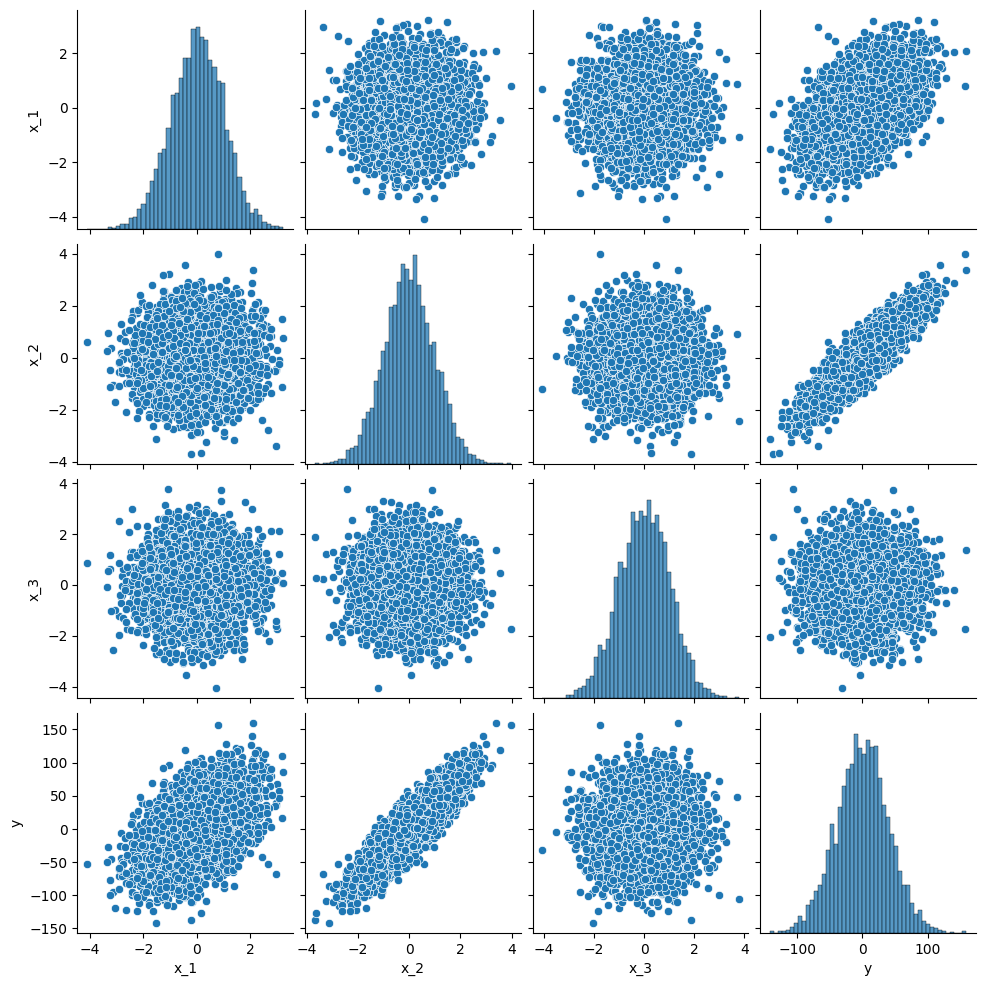

In [72]:
from sklearn.datasets import make_regression
import seaborn
import matplotlib.pylab as plt
import pandas as pd

X, y = make_regression(n_samples = 5000, n_features = 3, n_informative = 2, noise = 1)
df = pd.DataFrame(X, columns = [f"x_{i+1}" for i in range(X.shape[1])])
df.loc[:, "y"] = y

seaborn.pairplot(df)
plt.show()

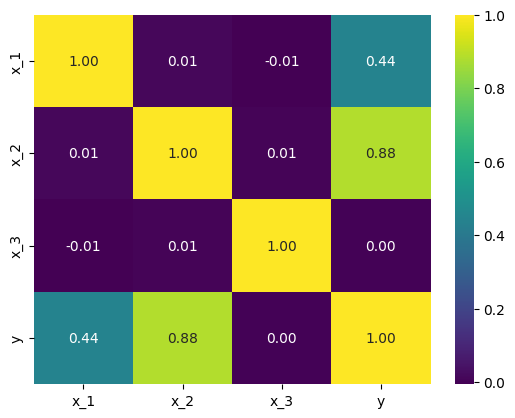

In [73]:
sns.heatmap(df.corr(method = "spearman"), annot=True, fmt = ".2f", cmap = "viridis")
plt.show()

In [74]:
df.describe()

,x_1,x_2,x_3,y
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.017503,0.004949,0.007708,0.493382
std,0.996606,0.993269,1.019209,40.312545
min,-4.098340,-3.691113,-4.064198,-141.508946
25%,-0.653020,-0.663236,-0.673704,-26.108777
50%,0.039528,-0.002851,0.020580,0.899847
75%,0.701056,0.666542,0.706880,27.192185
max,3.225931,3.974808,3.771698,159.396467


In [75]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [76]:
lr.intercept_

-0.004695907053644199

In [77]:
lr.coef_

array([ 1.83094624e+01,  3.59091868e+01, -1.53582421e-02])

In [78]:
lr.rank_

3

In [79]:
lr.singular_

array([72.08578083, 70.86748204, 69.7953523 ])

In [80]:
lr.n_features_in_

3

In [81]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [82]:
lr.score(X, y)

0.9993717557126911

In [83]:
from sklearn.metrics import mean_absolute_error, r2_score

y_hat = lr.predict(X)
r2_score(y, y_hat)

0.9993717557126911

In [84]:
mean_absolute_error(y, y_hat)

0.8023652432935562

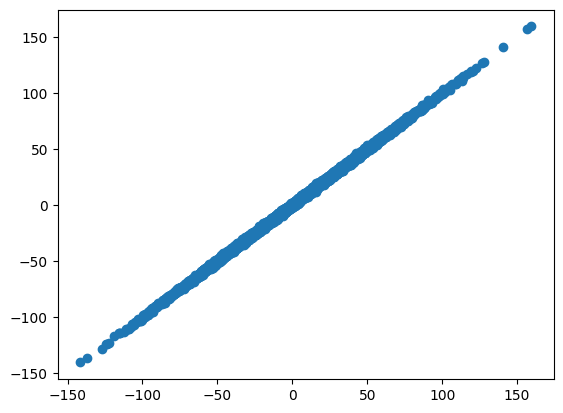

In [89]:
import matplotlib.pylab as plt

e = y - y_hat
plt.scatter(y, y_hat)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df_train, df_test = train_test_split(df, test_size = 0.3)
X_train, X_test = df_train.drop(["y"], axis = 1), df_test.drop(["y"], axis = 1)
y_train, y_test = df_train.loc[:, "y"], df_test.loc[:, "y"]

lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat_train = lr.predict(X_train)
y_hat_test = lr.predict(X_test)

mae_train = mean_absolute_error(y_train, y_hat_train)
mae_test = mean_absolute_error(y_test, y_hat_test)

r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

mae = [mae_train, mae_test]
r2 = [r2_train, r2_test]

results = pd.DataFrame(dict(mae = mae, r2 = r2), index = ["train", "test"])
results

,mae,r2
train,0.800342,0.999376
test,0.807795,0.999362


In [103]:
lr.coef_

array([ 1.82983156e+01,  3.59110334e+01, -1.21173435e-02])

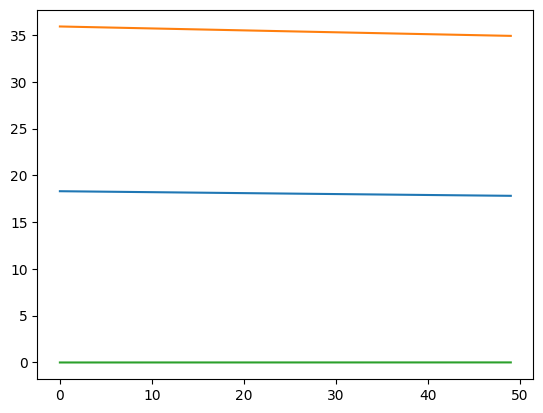

In [110]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
import numpy as np

alphas = np.linspace(0.1, 100, 50)
betas = []
for alpha in alphas:
    lr_ridge = Ridge(alpha = alpha)
    lr_ridge.fit(X_train, y_train)
    betas.append(lr_ridge.coef_)

plt.plot(np.array(betas))
plt.show()

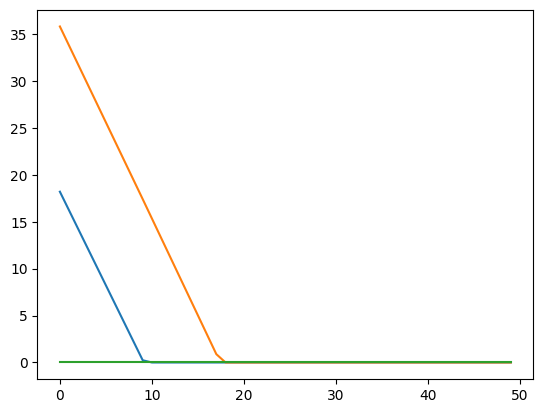

In [112]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
import numpy as np

alphas = np.linspace(0.1, 100, 50)
betas = []
for alpha in alphas:
    lr_lasso = Lasso(alpha = alpha)
    lr_lasso.fit(X_train, y_train)
    betas.append(lr_lasso.coef_)

plt.plot(np.array(betas))
plt.show()

In [123]:
from sklearn.model_selection import KFold

cv_folder = KFold(n_splits = 5)
mae_cv, r2_cv = [], []
for train_idx, test_idx in cv_folder.split(df):
    df_train, df_test = df.loc[train_idx, :], df.loc[test_idx, :]
    X_train, X_test = df_train.drop(["y"], axis = 1), df_test.drop(["y"], axis = 1)
    y_train, y_test = df_train.loc[:, "y"], df_test.loc[:, "y"]

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_hat_train = lr.predict(X_train)
    y_hat_test = lr.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_hat_train)
    mae_test = mean_absolute_error(y_test, y_hat_test)

    r2_train = lr.score(X_train, y_train)
    r2_test = lr.score(X_test, y_test)

    mae_cv.append(mae_test)
    r2_cv.append(r2_test)

print(f"{np.mean(mae_cv):.4f}")
print(f"{np.mean(r2_cv):.4f}")

0.8030
0.9994


# Case study - California Housing

In [1]:
from sklearn.datasets import fetch_california_housing

cf_housing = fetch_california_housing()
cf_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

## Descriptive analysis

In [49]:
import pandas as pd

cf_df = pd.DataFrame(cf_housing.data, columns = cf_housing.feature_names)
cf_df.loc[:, cf_housing.target_names] = cf_housing.target
#cf_df.loc[:, "LatLong"] = cf_df.Latitude * cf_df.Longitude
cf_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
cf_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [51]:
cf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [52]:
cf_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

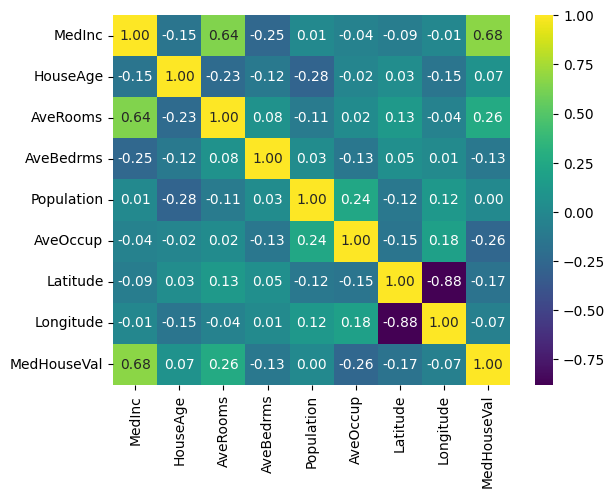

In [53]:
import seaborn as sns

sns.heatmap(cf_df.corr(method = "spearman"), annot=True, fmt = ".2f", cmap = "viridis")

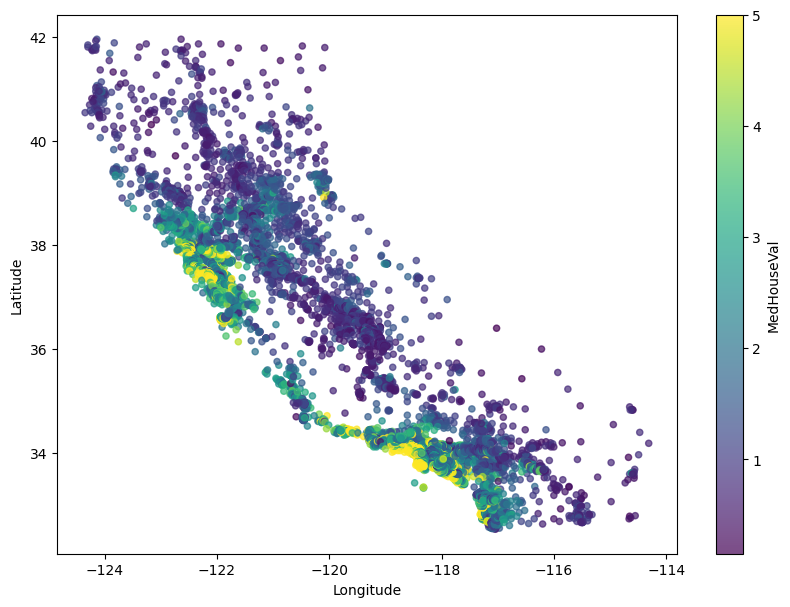

In [42]:
import matplotlib.pylab as plt

cf_df.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="viridis", colorbar=True, legend=True, sharex=False, figsize=(10,7), alpha=0.7)
plt.show()

## Implement kfold validation with linear regression

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

cv_folder = KFold(shuffle=True)
r2_test = []
for train_idx, test_idx in cv_folder.split(cf_df):
    X_train, X_test = cf_df.loc[train_idx, :].drop(["MedHouseVal"], axis = 1), cf_df.loc[test_idx, :].drop(["MedHouseVal"], axis = 1)
    y_train, y_test = cf_df.loc[train_idx, :].MedHouseVal, cf_df.loc[test_idx, :].MedHouseVal

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_s, y_train)
    y_train_hat, y_test_hat = lr.predict(X_train_s), lr.predict(X_test_s)

    r2_train_split, r2_test_split = r2_score(y_train, y_train_hat), r2_score(y_test, y_test_hat)
    r2_test.append(r2_test_split)

np.mean(r2_test)

0.6039375417024277

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

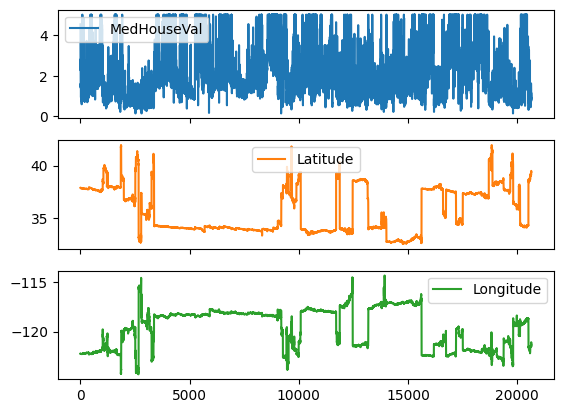

In [55]:
cf_df.loc[:, ["MedHouseVal", "Latitude", "Longitude"]].plot(subplots=True)

## Determine feature importance

In [152]:
X, y = cf_df.drop(["MedHouseVal"], axis = 1), cf_df.MedHouseVal
lr = LinearRegression()
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
lr.fit(X_s, y)
y_hat = lr.predict(X_s)
e = y - y_hat

for f_name, f_score in zip(cf_df.drop(["MedHouseVal"], axis = 1).columns, lr.coef_):
    print(f"Coefficient for standardized variable {f_name}: {f_score:.4f}")

lr.score(X_s, y)

Coefficient for standardized variable MedInc: 0.8296
Coefficient for standardized variable HouseAge: 0.1188
Coefficient for standardized variable AveRooms: -0.2655
Coefficient for standardized variable AveBedrms: 0.3057
Coefficient for standardized variable Population: -0.0045
Coefficient for standardized variable AveOccup: -0.0393
Coefficient for standardized variable Latitude: -0.8999
Coefficient for standardized variable Longitude: -0.8705


0.606232685199805

In [153]:
from sklearn.inspection import permutation_importance

r = permutation_importance(lr, X_s, y, n_repeats=20, scoring = "neg_mean_absolute_error")

for f_name, f_score in zip(cf_df.drop(["MedHouseVal"], axis = 1).columns, r.importances_mean):
    print(f"Permutation feature importance for standardized variable {f_name}: {f_score:.4f}")

Permutation feature importance for standardized variable MedInc: 0.5159
Permutation feature importance for standardized variable HouseAge: 0.0120
Permutation feature importance for standardized variable AveRooms: 0.0342
Permutation feature importance for standardized variable AveBedrms: 0.0430
Permutation feature importance for standardized variable Population: 0.0000
Permutation feature importance for standardized variable AveOccup: 0.0012
Permutation feature importance for standardized variable Latitude: 0.6379
Permutation feature importance for standardized variable Longitude: 0.6174


## Visual inspection of prediction results

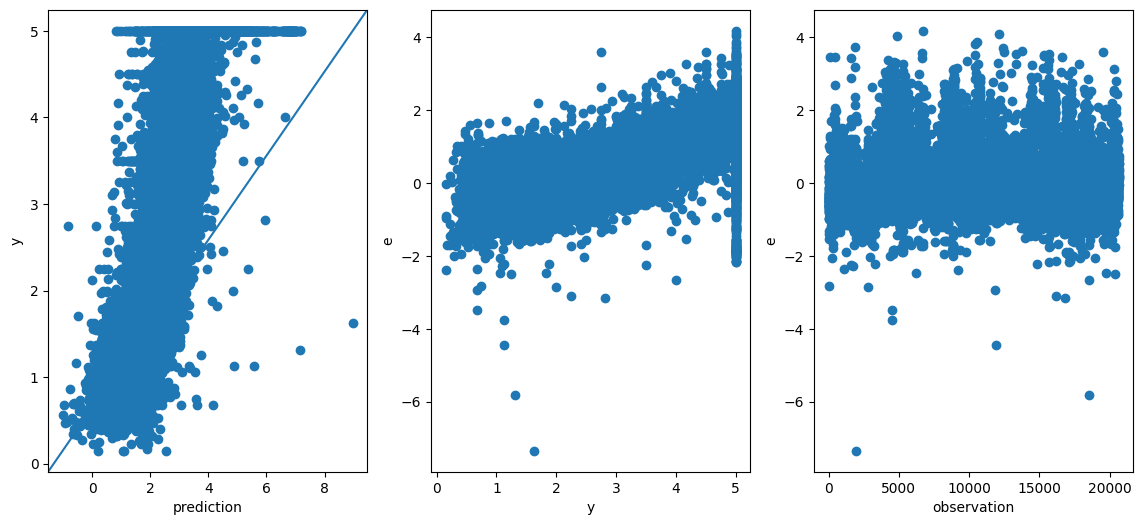

In [117]:
import matplotlib.pylab as plt

fig, axs = plt.subplots(1, 3, figsize = (14, 6))
axs[0].scatter(y_hat, y)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes)
axs[1].scatter(y, e)
axs[2].scatter(list(range(len(e))), e)
axs[0].set_xlabel("prediction")
axs[0].set_ylabel("y")
axs[1].set_xlabel("y")
axs[1].set_ylabel("e")
axs[2].set_xlabel("observation")
axs[2].set_ylabel("e")
plt.show()

## Different models

In [124]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import numpy as np

cv_folder = KFold(shuffle=True)

def cv_validation(Predictor):
    r2_train, r2_test = [], []
    for train_idx, test_idx in cv_folder.split(cf_df):
        X_train, X_test = cf_df.loc[train_idx, :].drop(["MedHouseVal"], axis = 1), cf_df.loc[test_idx, :].drop(["MedHouseVal"], axis = 1)
        y_train, y_test = cf_df.loc[train_idx, :].MedHouseVal, cf_df.loc[test_idx, :].MedHouseVal

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

        model = Predictor
        model.fit(X_train_s, y_train)
        y_train_hat, y_test_hat = model.predict(X_train_s), model.predict(X_test_s)

        r2_train_split, r2_test_split = r2_score(y_train, y_train_hat), r2_score(y_test, y_test_hat)
        r2_train.append(r2_train_split)
        r2_test.append(r2_test_split) 
        return np.mean(r2_train), np.mean(r2_test)


r2_train_nn, r2_test_nn = cv_validation(MLPRegressor(max_iter = 300))
print(f"Avg. training r2 score for a neural network: {r2_train_nn:.4f}")
print(f"Avg. test r2 score for a neural network: {r2_test_nn:.4f}")

r2_train_gb, r2_test_gb = cv_validation(GradientBoostingRegressor())
print(f"Avg. training r2 score for a gradient boosting model: {r2_train_gb:.4f}")
print(f"Avg. test r2 score for a gradient boosting model: {r2_test_gb:.4f}")

r2_train_rf, r2_test_rf = cv_validation(RandomForestRegressor())
print(f"Avg. training r2 score for a random forest model: {r2_train_rf:.4f}")
print(f"Avg. test r2 score for a random forest model: {r2_test_rf:.4f}")

Avg. training r2 score for a neural network: 0.8002
Avg. test r2 score for a neural network: 0.7835
Avg. training r2 score for a gradient boosting model: 0.8044
Avg. test r2 score for a gradient boosting model: 0.7888
Avg. training r2 score for a random forest model: 0.9732
Avg. test r2 score for a random forest model: 0.8104


## Hyperparameter tuning with optuna

In [96]:
import optuna

cv_folder = KFold(shuffle=True)

def objective(trial):

    n_layers = trial.suggest_categorical("n_layers", [1, 2])
    n_neurons = trial.suggest_categorical("n_neurons", [16, 32, 64, 128])
    lr = trial.suggest_float("learning_rate", 0.001, 0.1)

    r2_test = []
    for train_idx, test_idx in cv_folder.split(cf_df):
        X_train, X_test = cf_df.loc[train_idx, :].drop(["MedHouseVal"], axis = 1), cf_df.loc[test_idx, :].drop(["MedHouseVal"], axis = 1)
        y_train, y_test = cf_df.loc[train_idx, :].MedHouseVal, cf_df.loc[test_idx, :].MedHouseVal

        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_s, X_test_s = scaler.transform(X_train), scaler.transform(X_test)

        mlp = MLPRegressor(hidden_layer_sizes=[int(n_neurons / 2**i) for i in range(n_layers)], learning_rate_init=lr, max_iter=300)
        mlp.fit(X_train_s, y_train)
        y_test_hat = mlp.predict(X_test_s)

        r2_test_split = r2_score(y_test, y_test_hat)
        r2_test.append(r2_test_split) 
        return np.mean(r2_test)
    
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2024-06-05 10:53:18,562] A new study created in memory with name: no-name-958cc5f9-498a-486c-b54a-bb93dba923c5
[I 2024-06-05 10:53:18,843] Trial 0 finished with value: 0.7609653724427015 and parameters: {'n_layers': 1, 'n_neurons': 32, 'learning_rate': 0.06550505016217138}. Best is trial 0 with value: 0.7609653724427015.
[I 2024-06-05 10:53:19,204] Trial 1 finished with value: 0.7545855918468323 and parameters: {'n_layers': 1, 'n_neurons': 16, 'learning_rate': 0.032566129881131584}. Best is trial 0 with value: 0.7609653724427015.
[I 2024-06-05 10:53:29,223] Trial 2 finished with value: 0.7850681780904754 and parameters: {'n_layers': 2, 'n_neurons': 128, 'learning_rate': 0.019320420239680305}. Best is trial 2 with value: 0.7850681780904754.
[I 2024-06-05 10:53:30,069] Trial 3 finished with value: 0.7381915240742547 and parameters: {'n_layers': 1, 'n_neurons': 64, 'learning_rate': 0.09751407755981449}. Best is trial 2 with value: 0.7850681780904754.
[I 2024-06-05 10:53:30,341] Trial 4

In [97]:
study.best_params

{'n_layers': 2, 'n_neurons': 128, 'learning_rate': 0.006540099433227316}

In [98]:
study.best_value

0.8052641714888504

## Feature importance and evaluation of an optimized neural network

In [122]:
n_layers = study.best_params["n_layers"]
n_neurons = study.best_params["n_neurons"]
lr = study.best_params["learning_rate"]

mlp = MLPRegressor(hidden_layer_sizes=[int(n_neurons / 2**i) for i in range(n_layers)], learning_rate_init=lr, max_iter=300)
mlp.fit(X_s, y)
r = permutation_importance(mlp, X_s, y, n_repeats=20, scoring = "neg_mean_absolute_error")

for f_name, f_score in zip(cf_df.drop(["MedHouseVal"], axis = 1).columns, r.importances_mean):
    print(f"Permutation feature importance for standardized variable {f_name}: {f_score:.4f}")

Permutation feature importance for standardized variable MedInc: 0.3724
Permutation feature importance for standardized variable HouseAge: 0.0930
Permutation feature importance for standardized variable AveRooms: 0.1749
Permutation feature importance for standardized variable AveBedrms: 0.0755
Permutation feature importance for standardized variable Population: 0.0450
Permutation feature importance for standardized variable AveOccup: 0.1664
Permutation feature importance for standardized variable Latitude: 0.7102
Permutation feature importance for standardized variable Longitude: 0.7084


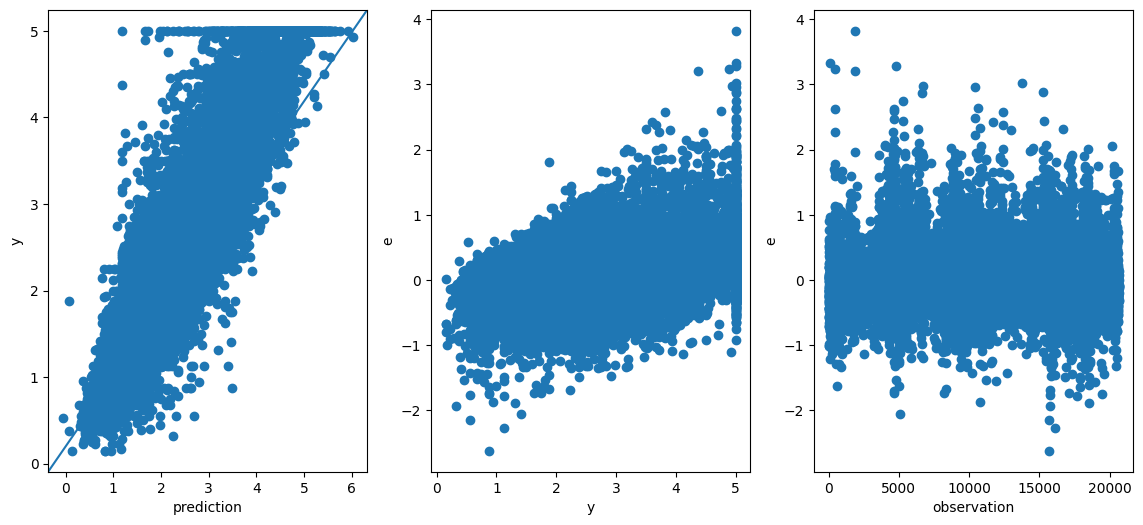

In [123]:
import matplotlib.pylab as plt

y_hat = mlp.predict(X_s)
e = y - y_hat

fig, axs = plt.subplots(1, 3, figsize = (14, 6))
axs[0].scatter(y_hat, y)
axs[0].plot([0, 1], [0, 1], transform=axs[0].transAxes)
axs[1].scatter(y, e)
axs[2].scatter(list(range(len(e))), e)
axs[0].set_xlabel("prediction")
axs[0].set_ylabel("y")
axs[1].set_xlabel("y")
axs[1].set_ylabel("e")
axs[2].set_xlabel("observation")
axs[2].set_ylabel("e")
plt.show()

# Dimensionality reduction 

In [1]:
import yfinance as yf
import pandas as pd

tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp_const = tables[0]
historical = tables[1]
historical.loc[:, ("Date", "Date")] = pd.to_datetime(historical.loc[:, ("Date", "Date")])
removed_symbols_since_2019 = historical[historical.loc[:, ("Date", "Date")] > pd.to_datetime("2019-01-01")].loc[:, ("Removed", "Ticker")].unique().tolist()
added_symbols_since_2019 = historical[historical.loc[:, ("Date", "Date")] > pd.to_datetime("2019-01-01")].loc[:, ("Added", "Ticker")].unique().tolist()
removed_symbols_since_2019 = [ticker for ticker in removed_symbols_since_2019 if isinstance(ticker, str)]
sp_removed = yf.download(removed_symbols_since_2019, start = "2019-01-01")
sp_removed_close = sp_removed.loc[:, "Adj Close"]
sp_removed_close = sp_removed_close.loc[:, sp_removed_close.columns[sp_removed_close.isna().mean() < 1].tolist()]
sp_current = yf.download(sp_const.Symbol.tolist(), start = "2019-01-01")
sp_current_close = sp_current.loc[:, "Adj Close"]
sp_current_close = sp_current_close.loc[:, sp_current_close.columns[sp_current_close.isna().mean() < 1].tolist()]

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*                      2%%                      ]  2 of 95 completed/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be remo

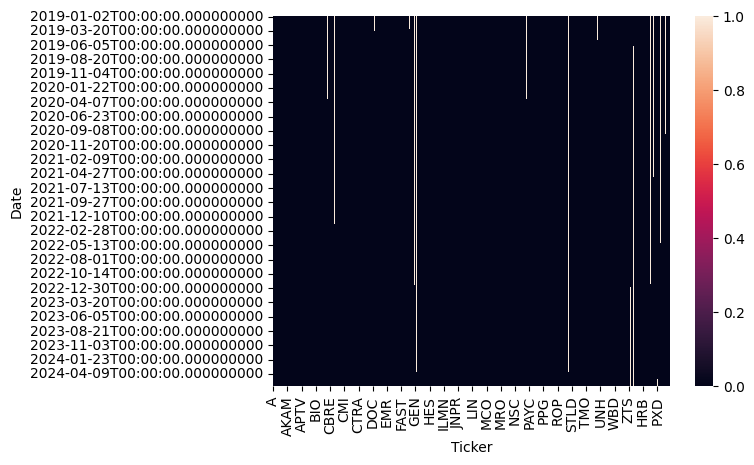

In [3]:
import seaborn as sns
import matplotlib.pylab as plt
sp_full = sp_current_close.merge(sp_removed_close, left_index=True, right_index=True)
sns.heatmap(sp_full.isna())
plt.show()

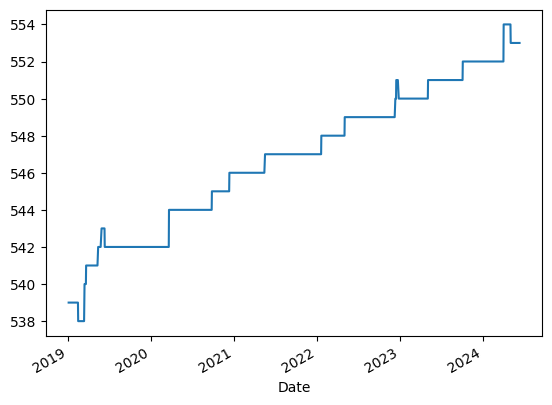

In [116]:
sp_returns = sp_full.pct_change(fill_method = None).iloc[1:, :]
cols_with_missing_only = sp_returns.columns[sp_returns.isna().mean() == 1].tolist()
sp_returns.drop(cols_with_missing_only, axis = 1, inplace = True)
sp_returns.notnull().sum(axis = 1).plot()
plt.show()

/Users/ralf/Library/Mobile Documents/com~apple~CloudDocs/Kurse/SCDP/.venv/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


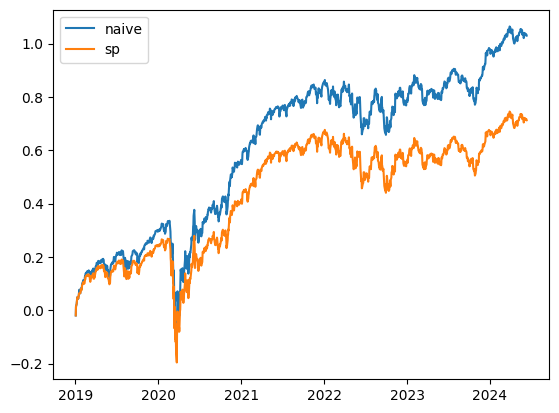

In [117]:
sp_etf = yf.download("^SPXEW", start = "2019-01-01")
sp_etf_return = sp_etf.loc[:, "Adj Close"].pct_change().dropna()
daily_naive_pf = sp_returns.mean(axis = 1)
plt.plot(daily_naive_pf.cumsum(), label = "naive")
plt.plot(sp_etf_return.cumsum(), label = "sp")
plt.legend()
plt.show()

In [118]:
from sklearn.decomposition import PCA

estimation_start = pd.to_datetime("2019-01-01")
estimation_end = pd.to_datetime("2021-01-01")
estimation_df = sp_returns.loc[estimation_start:estimation_end, :]
tickers_with_missing_values = estimation_df.columns[estimation_df.isna().sum() > 0].tolist()
estimation_df.drop(tickers_with_missing_values, axis = 1, inplace = True)
tickers_to_use = np.random.choice(estimation_df.columns.tolist(), size = 150, replace=False)
estimation_df = estimation_df.loc[:, tickers_to_use]
estimation_df_standardized = (estimation_df - estimation_df.mean()).divide(estimation_df.std())

pca = PCA()
pca.fit(estimation_df_standardized)

/var/folders/37/wfj7rcz96tl8dyvnx66h_lg00000gn/T/ipykernel_23210/1600023660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estimation_df.drop(tickers_with_missing_values, axis = 1, inplace = True)


PCA()

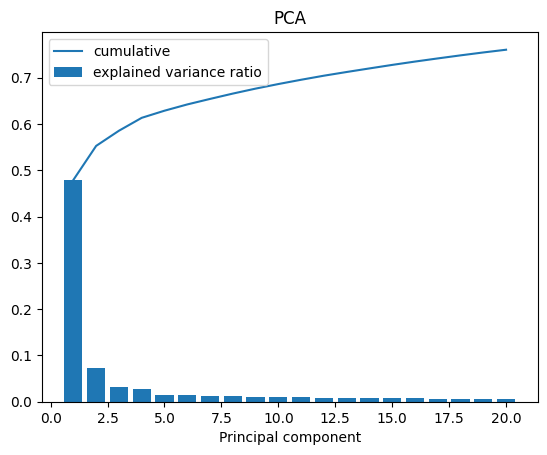

In [119]:
import numpy as np

n_components = 20
fig, ax = plt.subplots()
ax.bar(np.arange(1, n_components+1), pca.explained_variance_ratio_[:n_components], label = "explained variance ratio")
ax.plot(np.arange(1, n_components+1), np.cumsum(pca.explained_variance_ratio_[:n_components]), label = "cumulative")
ax.set_title("PCA")
ax.set_xlabel("Principal component")
ax.legend()
plt.show()


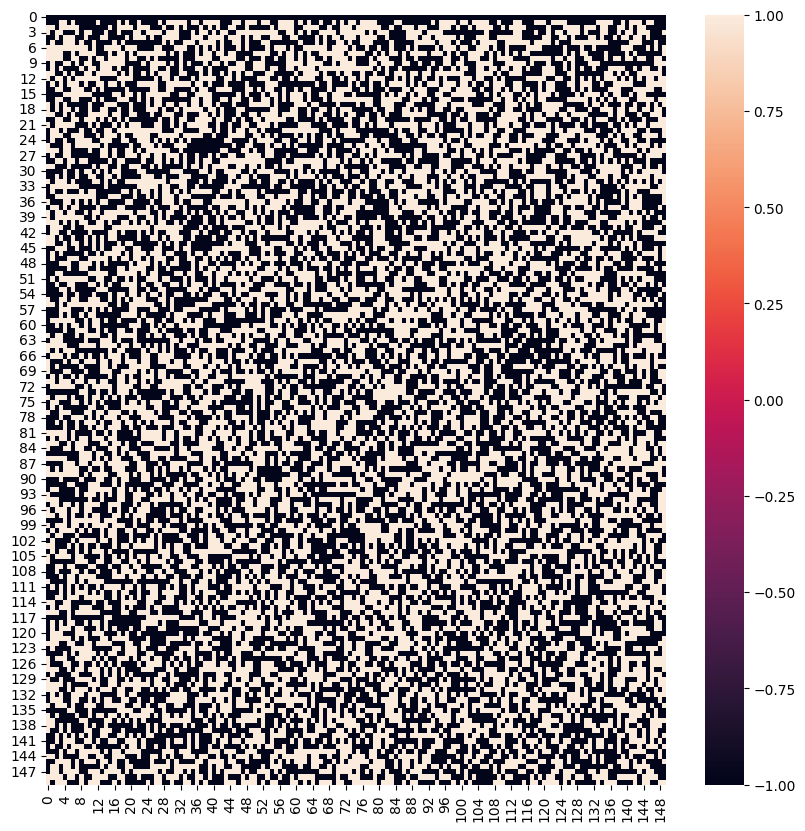

In [120]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(np.sign(pca.components_), ax = ax)
plt.show()

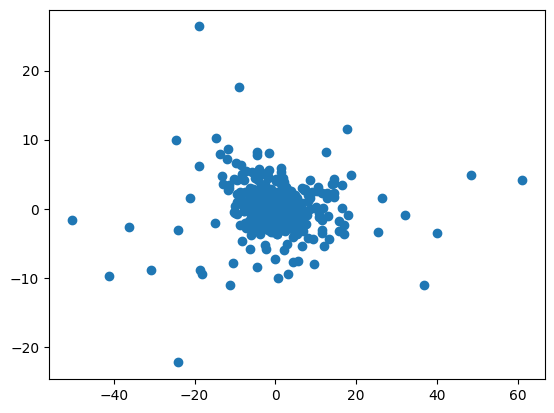

In [121]:
Z = pca.transform(estimation_df_standardized)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

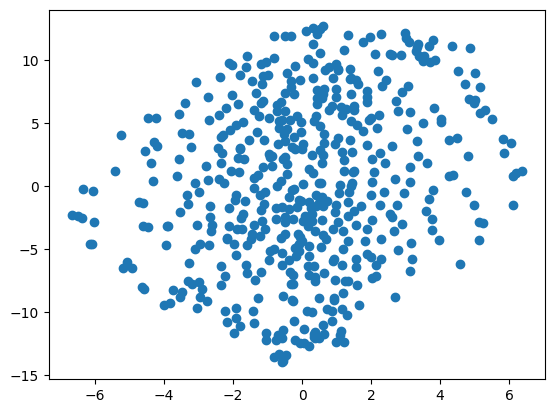

In [122]:
from sklearn.manifold import TSNE

tsne = TSNE()
Z_tsne = tsne.fit_transform(estimation_df_standardized)
plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1])
plt.show()

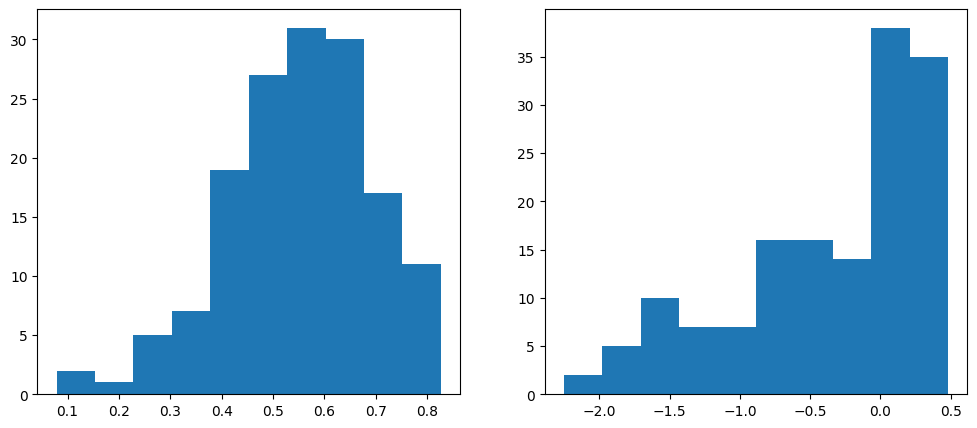

In [124]:
from sklearn.linear_model import LinearRegression

Z_pca = Z[:, :2]

r2_pca_scores, r2_tsne_scores = [], []
for col in estimation_df.columns:
    lr_pca = LinearRegression()
    lr_tsne = LinearRegression()
    lr_pca.fit(Z_pca, estimation_df.loc[:, col])
    lr_tsne.fit(Z_tsne, estimation_df.loc[:, col])
    r2_pca_tmp = lr_pca.score(Z_pca, estimation_df.loc[:, col])
    r2_tsne_tmp = lr_pca.score(Z_tsne, estimation_df.loc[:, col])
    r2_pca_scores.append(r2_pca_tmp)
    r2_tsne_scores.append(r2_tsne_tmp)

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].hist(r2_pca_scores)
axs[1].hist(r2_tsne_scores)
plt.show()

In [125]:
means = sp_returns.mean()
stds = sp_returns.std()
skews = sp_returns.skew()
kurts = sp_returns.kurtosis()

moments = pd.concat((means, stds, skews, kurts), axis = 1)
moments.columns = ["means", "stds", "skews", "kurts"]
moments

,means,stds,skews,kurts
Ticker,,,,
A,0.000708,0.018445,-0.181679,4.421588
AAL,-0.000060,0.037910,1.456852,18.697244
AAPL,0.001443,0.019960,0.006873,5.346145
ABBV,0.000771,0.015750,-1.322730,14.994995
ABNB,0.000534,0.032019,0.220631,1.730002
...,...,...,...,...
WHR,0.000338,0.025290,0.490613,19.136855
WU,0.000157,0.018858,-0.151039,5.615391
XRAY,0.000020,0.021324,0.422907,9.308373


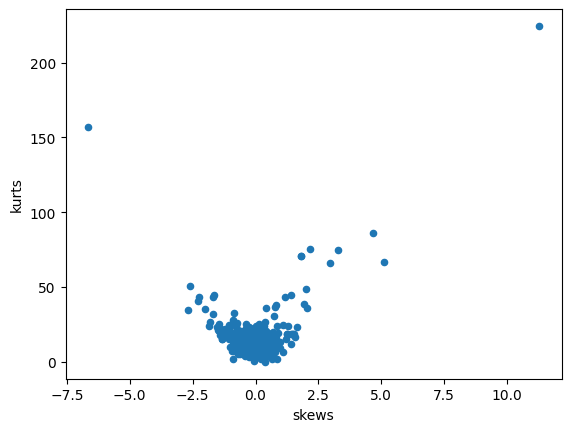

In [126]:
moments.plot.scatter(x = "skews", y = "kurts")
plt.show()

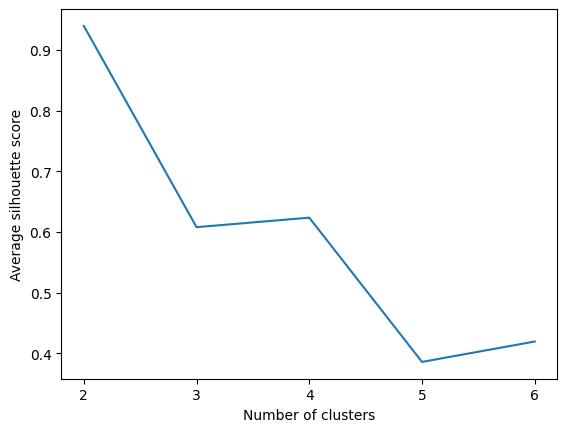

In [131]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

kmeans = KMeans(n_clusters = 2)
cluster_df = moments.loc[:, ["skews", "kurts"]]
X = (cluster_df - cluster_df.mean()).divide(cluster_df.std())

scores = []
max_clusters = 7
for n_cluster in range(2, max_clusters): 
    kmeans = KMeans(n_clusters = n_cluster, n_init = "auto", random_state = 42)
    kmeans.fit(X)
    silhouette_scores = silhouette_samples(X, kmeans.labels_, metric = "euclidean")
    scores.append(silhouette_scores.mean())

fig, ax = plt.subplots()
ax.plot(scores)
ax.set_xticks([0, 1, 2, 3, 4], ["2", "3", "4", "5", "6"])
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Average silhouette score")
plt.show()

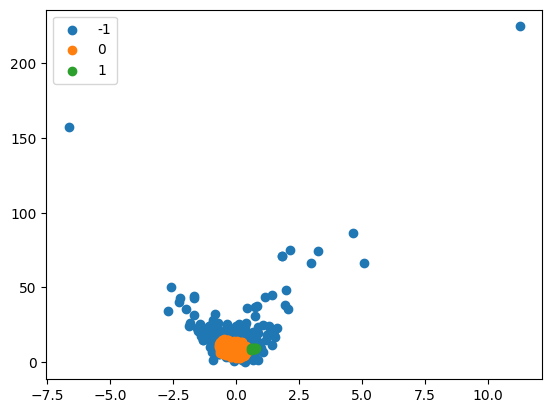

In [148]:
from sklearn.cluster import HDBSCAN

hdb_cluster_df = cluster_df.copy()
hdbscan = HDBSCAN(min_cluster_size = 10)
hdbscan.fit(X)
hdb_cluster_df.loc[:, "cluster"] = hdbscan.labels_

for cluster in np.unique(hdbscan.labels_):
    cluster_tmp = cluster_df[hdb_cluster_df.cluster == cluster] 
    plt.scatter(cluster_tmp.skews, cluster_tmp.kurts, label = str(cluster))
    #hdb_cluster_df[hdb_cluster_df.cluster == cluster].plot.scatter("skews", "kurts", ax = ax, label = f"{cluster}")
plt.legend()